In [18]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [19]:
n = 100
m = 300
A = np.random.randn(m, n)
b = np.random.randn(m)
np.linalg.cond(A)

3.71526271161204

In [20]:
U, s, V = np.linalg.svd(A, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
S = S**2

A = np.dot(U, np.dot(S, V))
np.linalg.cond(A)

13.803177016294844

In [21]:
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

In [22]:
eps = 1e-10

In [23]:
def quad_grad(y):
    return np.dot(AtA, y) - Atb

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-06
iter num 100, norm(Gk)/(1+norm(xk)): 9.95e-02, step-size: 2.32e-06
iter num 200, norm(Gk)/(1+norm(xk)): 4.95e-05, step-size: 2.37e-06
iter num 300, norm(Gk)/(1+norm(xk)): 9.17e-09, step-size: 2.88e-06
iter num 361, norm(Gk)/(1+norm(xk)): 9.52e-11, step-size: 2.59e-06
terminated
--- 0.510421991348 seconds ---


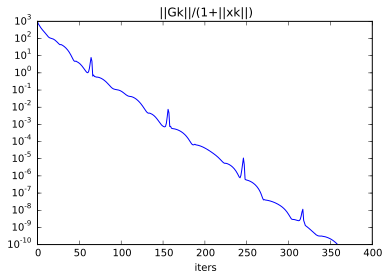

In [24]:
import time
start_time = time.time()
x = apg.solve(quad_grad, {}, np.zeros(n), eps = eps, gen_plots=True)
print("--- %s seconds ---" % (time.time() - start_time))

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-06
iter num 100, norm(Gk)/(1+norm(xk)): 3.76e+01, step-size: 5.12e-06
iter num 200, norm(Gk)/(1+norm(xk)): 7.23e+00, step-size: 2.90e-06
iter num 300, norm(Gk)/(1+norm(xk)): 9.79e-01, step-size: 1.59e-06
iter num 400, norm(Gk)/(1+norm(xk)): 2.75e-01, step-size: 4.31e-06
iter num 500, norm(Gk)/(1+norm(xk)): 6.22e-02, step-size: 2.90e-06
iter num 600, norm(Gk)/(1+norm(xk)): 1.73e-02, step-size: 1.71e-06
iter num 700, norm(Gk)/(1+norm(xk)): 7.15e-03, step-size: 4.62e-06
iter num 800, norm(Gk)/(1+norm(xk)): 3.12e-03, step-size: 2.58e-06
iter num 900, norm(Gk)/(1+norm(xk)): 1.06e-03, step-size: 1.76e-06
iter num 1000, norm(Gk)/(1+norm(xk)): 4.52e-04, step-size: 4.77e-06
iter num 1100, norm(Gk)/(1+norm(xk)): 2.07e-04, step-size: 2.88e-06
iter num 1200, norm(Gk)/(1+norm(xk)): 7.83e-05, step-size: 1.68e-06
iter num 1300, norm(Gk)/(1+norm(xk)): 3.47e-05, step-size: 4.56e-06
iter num 1400, norm(Gk)/(1+norm(xk)): 1.45e-05, step-size: 3.53e-

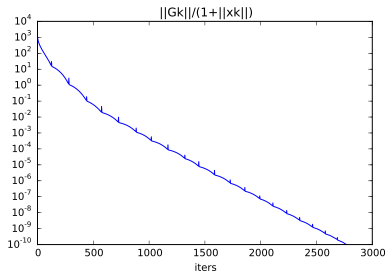

In [25]:
x_no_accleration = apg.solve(quad_grad, {}, np.zeros(n), eps = eps, use_gra=True, max_iters=10000, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-06
iter num 100, norm(Gk)/(1+norm(xk)): 1.03e+01, step-size: 2.60e-06
iter num 200, norm(Gk)/(1+norm(xk)): 1.69e+00, step-size: 2.12e-06
iter num 300, norm(Gk)/(1+norm(xk)): 5.04e-01, step-size: 1.90e-06
iter num 400, norm(Gk)/(1+norm(xk)): 4.08e-01, step-size: 1.98e-06
iter num 500, norm(Gk)/(1+norm(xk)): 1.35e-01, step-size: 1.68e-06
iter num 600, norm(Gk)/(1+norm(xk)): 6.98e-02, step-size: 1.74e-06
iter num 700, norm(Gk)/(1+norm(xk)): 5.32e-02, step-size: 1.87e-06
iter num 800, norm(Gk)/(1+norm(xk)): 1.34e-02, step-size: 1.98e-06
iter num 900, norm(Gk)/(1+norm(xk)): 8.59e-03, step-size: 2.26e-06
iter num 1000, norm(Gk)/(1+norm(xk)): 5.41e-03, step-size: 2.61e-06
iter num 1100, norm(Gk)/(1+norm(xk)): 1.83e-03, step-size: 2.81e-06
iter num 1200, norm(Gk)/(1+norm(xk)): 4.61e-04, step-size: 2.34e-06
iter num 1300, norm(Gk)/(1+norm(xk)): 1.22e-03, step-size: 2.59e-06
iter num 1400, norm(Gk)/(1+norm(xk)): 5.73e-04, step-size: 2.63e-

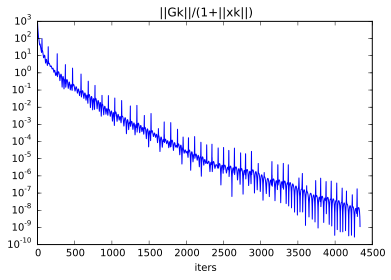

In [26]:
x_no_restart = apg.solve(quad_grad, {}, np.zeros(n), eps = eps, use_restart=False, max_iters=10000, gen_plots=True)

In [27]:
def cg(A, b, x=False, eps=1e-12, gen_plots=True):
    n = np.shape(A)[0]
    if not x:
        x = np.zeros(n)
    r = b - np.dot(A, x)
    p = np.copy(r)
    rsold = np.linalg.norm(r)**2

    max_iters = 10 * n # cg should only need n steps
    if gen_plots:
        errs = np.zeros(max_iters)
        import matplotlib.pyplot as plt

    k = 0
    for k in range(max_iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.inner(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.linalg.norm(r)**2
        err = rsnew**0.5 / (1 + np.linalg.norm(x))
        if gen_plots:
            errs[k] = err

        if err < eps:
              break
        p = r + p * (rsnew / rsold)
        rsold=rsnew
        
    if gen_plots:
        errs = errs[1:k]
        plt.semilogy(errs[1:k])
        plt.xlabel('iters')
        plt.title('||rk|| / (1 + ||xk||')

    return x

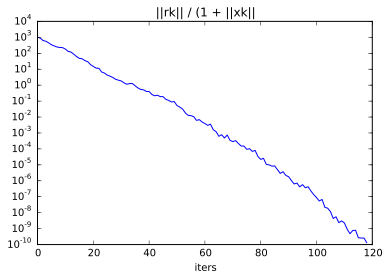

In [28]:
x_cg = cg(AtA, Atb, eps = eps)

In [29]:
np.linalg.norm(x - x_cg) / np.linalg.norm(x_cg)

4.9811876591777801e-13

In [30]:
np.linalg.norm(np.dot(A,x) - b)

13.375793851385222

In [31]:
np.linalg.norm(np.dot(A,x_cg) - b)

13.37579385138522

In [32]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(cp.norm(A * z - b))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS, eps=1e-12)
x_scs = z.value.A1
np.linalg.norm(np.dot(A,x_scs) - b)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 30001
eps = 1.00e-12, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 101, constraints m = 301
Cones:	soc vars: 301, soc blks: 1
Setup time: 4.70e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  1.25e-03 
   100|      inf       inf       nan       inf       inf       inf  1.03e-02 
   180| 2.10e-13  1.23e-13  8.96e-16  1.34e+01  1.34e+01  1.08e-17  1.82e-02 
----------------------------------------------------------------------------
Stat

13.37579385138522

In [33]:
np.linalg.norm(x_scs - x_cg) / np.linalg.norm(x_cg)

2.5635335874807392e-13

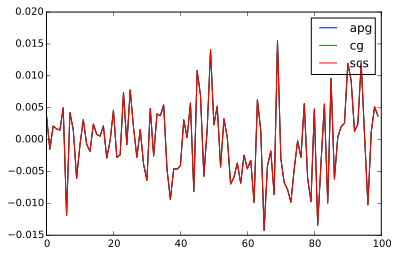

In [34]:
plt.plot(x, label='apg')
plt.plot(x_cg, label='cg')
plt.plot(x_scs, label='scs')
plt.legend()